In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# % matplotlib inline
plt.style.use('ggplot')

In [273]:
pd.set_option('max_columns', 1000)
pd.set_option('max_row', 300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [274]:
df_train = pd.read_csv('train.csv')
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [275]:
df_train['SalePrice'].describe()

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

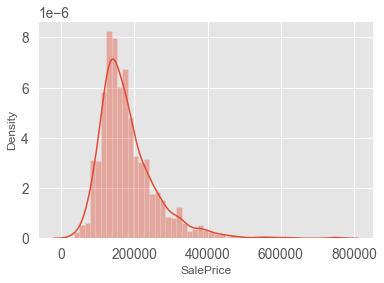

In [276]:
sns.distplot(df_train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

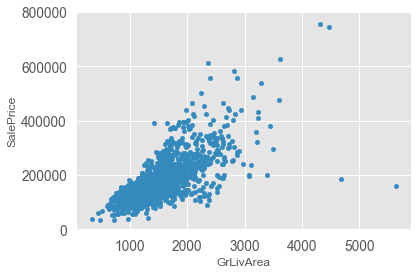

In [277]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

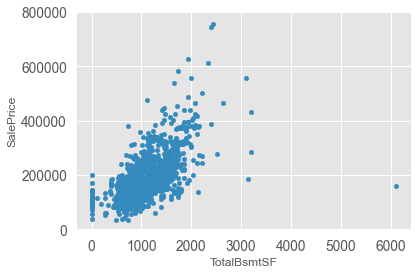

In [278]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

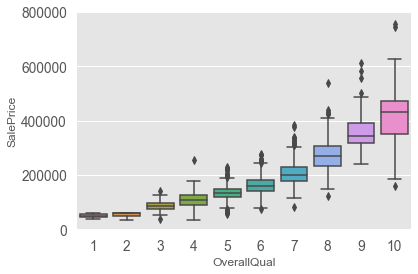

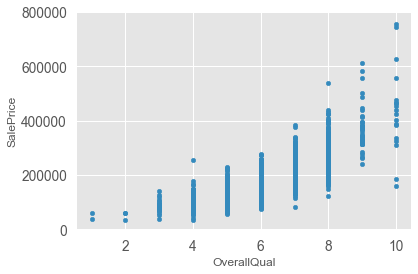

In [279]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

(-0.5, 111.5, 0.0, 800000.0)

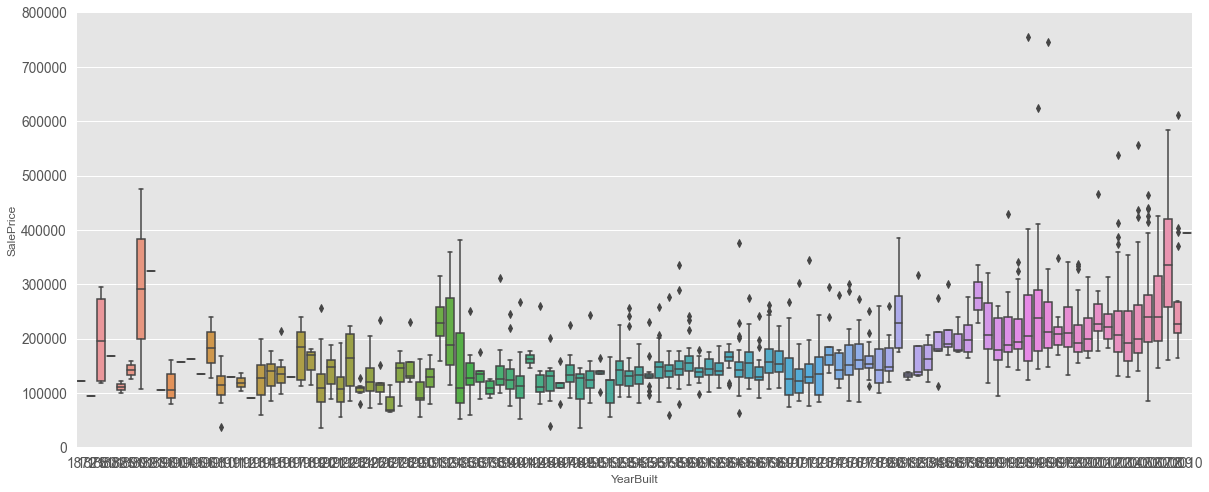

In [280]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

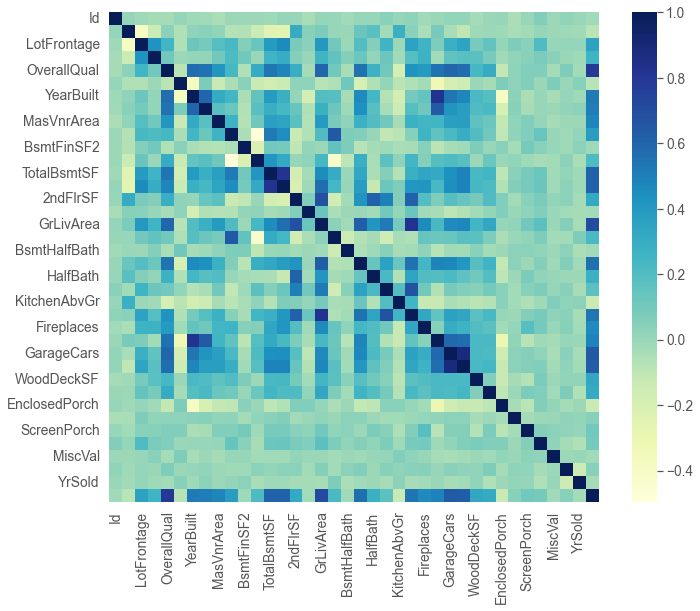

In [281]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, cmap='YlGnBu')
plt.show()


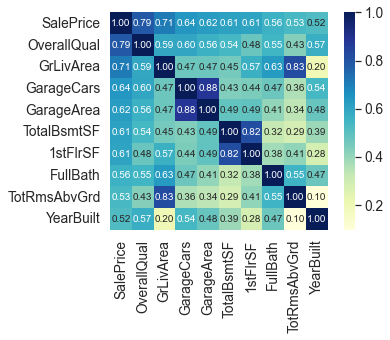

In [282]:
cols = corrmat.nlargest(10, 'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values, cmap='YlGnBu')
plt.show()


In [283]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print(f"The train data size is: {train.shape}")
print(f"The test data size is: {test.shape}")
test



The train data size is: (1460, 81)
The test data size is: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,TA,CBlock,TA,TA,No,Rec,468.00000,LwQ,144.00000,270.00000,882.00000,GasA,TA,Y,SBrkr,896,0,0,896,0.00000,0.00000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00000,Unf,1.00000,730.00000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00000,TA,TA,CBlock,TA,TA,No,ALQ,923.00000,Unf,0.00000,406.00000,1329.00000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00000,0.00000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00000,Unf,1.00000,312.00000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,TA,PConc,Gd,TA,No,GLQ,791.00000,Unf,0.00000,137.00000,928.00000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00000,0.00000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00000,Fin,2.00000,482.00000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00000,TA,TA,PConc,TA,TA,No,GLQ,602.00000,Unf,0.00000,324.00000,926.00000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00000,0.00000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00000,Fin,2.00000,470.00000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00000,Gd,TA,PConc,Gd,TA,No,ALQ,263.00000,Unf,0.00000,1017.00000,1280.00000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00000,0.00000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00000,RFn,2.00000,506.00000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.00000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.00000,TA,TA,CBlock,TA,TA,No,Unf,0.00000,Unf,0.00000,546.00000,546.00000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.00000,0.00000,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.00000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.00000,TA,TA,CBlock,TA,TA,No,Rec,252.00000,Unf,0.00000,294.00000,546.00000,GasA,TA,Y,SBrkr,546,546,0,1092,0.00000,0.00000,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.00000,Unf,1.00000,286.00000,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.00000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0000

Text(0.5, 0, 'GrLivArea')

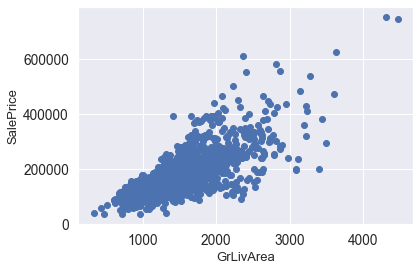

In [284]:
train = train.drop(train.query('GrLivArea > 4000 and SalePrice < 300000').index)
train = train.drop(train.query('TotalBsmtSF > 4000 and SalePrice < 300000').index)
train = train.drop(train.query('OverallQual <5 and SalePrice > 200000').index)
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 180881.39739190118 and sigma = 79470.70893399313


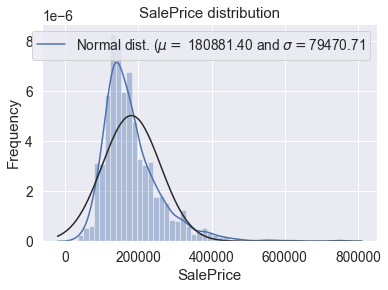

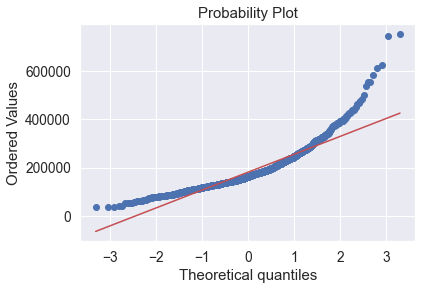

In [285]:
from scipy import stats
from scipy.stats import norm

sns.distplot(train['SalePrice'], fit=stats.norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print(f"mu = {mu} and sigma = {sigma}")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma= ${:.2f}'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()



/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu=180881.39739190118 sigma=79470.70893399313 


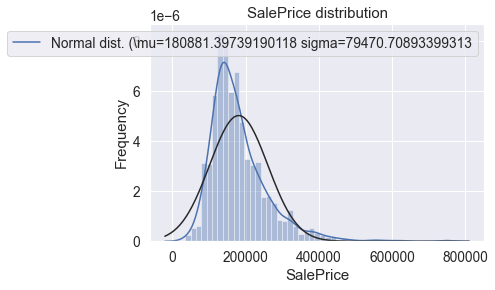

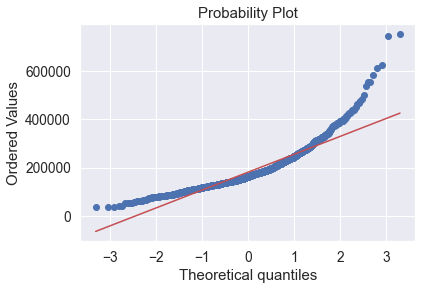

(2916, 79)


In [286]:
# train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train.SalePrice, fit=norm)

mu, sigma = norm.fit(train.SalePrice)
print(f"mu={mu} sigma={sigma} ")

plt.legend([f'Normal dist. (\mu={mu} sigma={sigma}'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train.SalePrice, plot=plt)
plt.show()

y_train = train.SalePrice.values
n_train = train.shape[0]
n_test = test.shape[0]
all_data = pd.concat([train, test], ignore_index=True)
all_data.drop(['Id', 'SalePrice'], axis=1, inplace=True)
print(all_data.shape)

In [287]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na[all_data_na > 0].sort_values(ascending=False)
all_data_na.head(100)
# all_data_na.index[:20]

PoolQC         99.69136
MiscFeature    96.39918
Alley          93.20988
Fence          80.41838
FireplaceQu    48.69684
LotFrontage    16.63237
GarageFinish    5.45267
GarageQual      5.45267
GarageCond      5.45267
GarageYrBlt     5.45267
GarageType      5.38409
BsmtExposure    2.81207
BsmtCond        2.81207
BsmtQual        2.77778
BsmtFinType2    2.74348
BsmtFinType1    2.70919
MasVnrType      0.82305
MasVnrArea      0.78875
MSZoning        0.13717
BsmtFullBath    0.06859
BsmtHalfBath    0.06859
Functional      0.06859
Utilities       0.06859
GarageArea      0.03429
GarageCars      0.03429
Electrical      0.03429
KitchenQual     0.03429
TotalBsmtSF     0.03429
BsmtUnfSF       0.03429
BsmtFinSF2      0.03429
BsmtFinSF1      0.03429
Exterior2nd     0.03429
Exterior1st     0.03429
SaleType        0.03429
dtype: float64

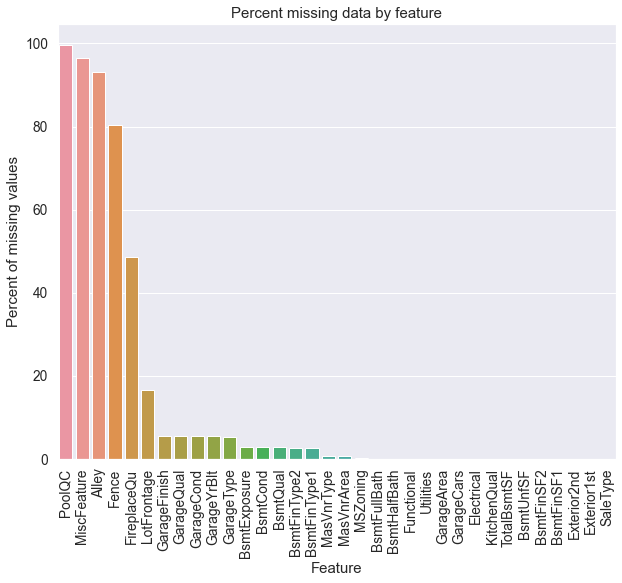

In [288]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [289]:
all_data.LotFrontage = all_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [290]:
num_cols = ['MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea']
for col in num_cols:
    all_data[col].fillna(0, inplace=True)

In [291]:
ob_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
           "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1",
           "MasVnrType"]
for col in ob_cols:
    all_data[col].fillna('None', inplace=True)

In [292]:
cat_cols = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual",
            "SaleType", "Exterior1st", "Exterior2nd"]
for col in cat_cols:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [293]:
all_data.isnull().sum()[all_data.isnull().sum() > 0]


Series([], dtype: int64)

In [294]:
NumStr = ["MSSubClass", "BsmtFullBath", "BsmtHalfBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "MoSold", "YrSold",
          "YearBuilt", "YearRemodAdd", "LowQualFinSF", "GarageYrBlt"]
for col in NumStr:
    all_data[col] = all_data[col].astype(str)


In [295]:
all_data['Utilities'].value_counts()

AllPub    2915
NoSeWa       1
Name: Utilities, dtype: int64

In [296]:
all_data = all_data.drop(['Utilities'], axis=1)


In [297]:
all_data.shape



(2916, 78)

In [298]:
from sklearn.preprocessing import LabelEncoder

cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish',
        'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold',
        'MoSold', 'YearBuilt', 'YearRemodAdd', 'LowQualFinSF', 'GarageYrBlt']
lbl = LabelEncoder()
for c in cols:
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))


In [299]:
all_data.shape


(2916, 78)

In [300]:
from scipy.stats import norm, skew

numeric_feats = all_data.select_dtypes(exclude=['object']).columns
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(' Skew in numerical features: \n')
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(10)


 Skew in numerical features: 



,Skew
MiscVal,21.93591
PoolArea,17.68560
LotArea,13.26255
3SsnPorch,11.37009
LowQualFinSF,10.91600
LandSlope,4.99455
BsmtFinSF2,4.14368
EnclosedPorch,4.00157
ScreenPorch,3.94430
MasVnrArea,2.62118


In [301]:
skewness = skewness[abs(skewness) > 0.75]
print(f'{skewness.shape[0]} skewed features')

from scipy.special import boxcox1p

skewed_feats = skewness.index
lam = 0.15
for feat in skewed_feats:
    all_data[feat] = boxcox1p(all_data[feat], lam)

53 skewed features


In [302]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2916, 236)


In [303]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [304]:
train = all_data[:n_train]
test = all_data[n_train:]

In [305]:
def rmsle_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=5))
    return rmse


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



In [306]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import sys

sys.path.append("..")

print(torch.__version__)
torch.set_default_tensor_type(torch.FloatTensor)

loss = torch.nn.MSELoss()

1.9.1


In [307]:
#先把合并的数据集重新分割为训练集和测试集
n_train = train.shape[0]
#通过values属性得到Numpy格式的数据，并转成Tensor方便后面的训练
#训练样本特征
train_features = torch.tensor(train.values, dtype=torch.float)
#测试样本特征
test_features = torch.tensor(test.values, dtype=torch.float)
#训练样本标签
train_labels = torch.tensor(y_train, dtype=torch.float).view(-1, 1)

In [308]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

In [309]:
#定义线性回归模型
def get_net(feature_num):
    net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(feature_num, 256),
        nn.ReLU(),
        nn.Linear(256, 1),
    )
    #模型参数初始化
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01)
    return net

In [310]:
#对数均方误差的实现
def log_rmse(net, features, labels):
    with torch.no_grad():
        #将小于1的值设成1，使的取对数时数值更稳定
        clipped_preds = torch.max(net(features), torch.tensor(1.0))
        rmse = torch.sqrt(loss(clipped_preds.log(), labels.log()))
    return rmse.item()

In [311]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    #把dataset放入DataLoader
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    #这里使用了Adam优化算法
    optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate, weight_decay=weight_decay)
    net = net.float()  #将神经网络中的数据类型设置维浮点型
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [312]:
# 本函数已保存在d2lzh包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    plt.subplots(figsize=figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

In [313]:
#K折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        #划分出验证数据集
        if j == 1:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        #划分出训练数据，剩下的进行合并
        else:
            X_train = torch.cat((X_train, X_part), dim=0)
            #dim=0按列合并
            y_train = torch.cat((y_train, y_part), dim=0)
    return X_train, y_train, X_valid, y_valid


def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net(X_train.shape[1])
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        #误差累计
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            semilogy(range(1, num_epochs + 1), train_ls,
                     'epochs', 'rmse',
                     range(1, num_epochs + 1), valid_ls,
                     ['train', 'valid'])
            #输出相应的结果：训练误差、验证误差
        print('fold%d,train rmse %f,valid rmse %f' %
              (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

fold0,train rmse 0.123160,valid rmse 0.128463
fold1,train rmse 0.117143,valid rmse 0.124890
fold2,train rmse 0.119279,valid rmse 0.126173
fold3,train rmse 0.120317,valid rmse 0.129152
fold4,train rmse 0.116563,valid rmse 0.124002
fold5,train rmse 0.136996,valid rmse 0.141102
fold6,train rmse 0.144847,valid rmse 0.142271
fold7,train rmse 0.126237,valid rmse 0.130276
8-fold validation:avg trian rmse 0.125568,avg valid rmse 0.130791


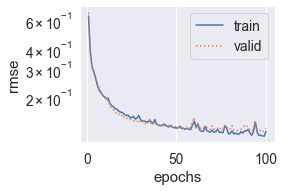

In [314]:
#模型选择
k, num_epochs, lr, weight_decay, batch_size = 8, 100, 0.1, 300, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)
print('%d-fold validation:avg trian rmse %f,avg valid rmse %f' %
      (k, train_l, valid_l))

In [315]:
#模型预测
def train_and_pred(train_features, test_features, train_labeld, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net(train_features.shape[1])
    #第二个变量（测试误差）缺省，用_代替
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).detach().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('./submission_deep_learning.csv', index=False)
    print("done")






train rmse 0.117563
done


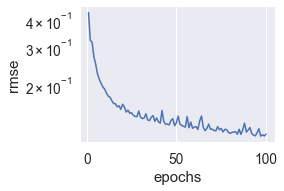

In [316]:
test1 = pd.read_csv('test.csv')
train_and_pred(train_features, test_features, train_labels,
               test1, num_epochs, lr, weight_decay, batch_size)